<a href="https://colab.research.google.com/github/TasniaKibria/CSE499B/blob/main/Updated_Notebook_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Read dataset as dataframe using Pandas
df = pd.read_csv('/content/drive/MyDrive/Fault_Data.csv')

In [ ]:
#Checking Dataframe Status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140097 entries, 0 to 140096
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       140070 non-null  float64
 1   Signal1    140070 non-null  float64
 2   Signal2    140070 non-null  float64
 3   Signal3    140070 non-null  float64
 4   FaultType  112056 non-null  float64
 5   Label      140097 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 6.4 MB


In [ ]:
#Checking statical relation
df.describe()

,Time,Signal1,Signal2,Signal3,FaultType,Label
count,140070.000000,140070.000000,140070.000000,140070.000000,112056.000000,140097.000000
mean,10.000000,0.000175,-0.000206,0.001059,3.500000,0.799846
std,5.776409,0.221867,0.782821,0.912612,1.118039,0.400117
min,0.000000,-2.529380,-2.479050,-2.996308,2.000000,0.000000
25%,5.000000,-0.144396,-0.765478,-0.914467,2.750000,1.000000
50%,10.000000,0.000128,-0.000986,0.001229,3.500000,1.000000
75%,15.000000,0.144397,0.765478,0.915420,4.250000,1.000000
max,20.000000,2.539004,2.496180,3.071744,5.000000,1.000000


In [ ]:
#Checking data frame table
df.head(10)

,Time,Signal1,Signal2,Signal3,FaultType,Label
0,0.00,-0.155287,-0.758693,0.913980,NaN,0
1,0.01,0.155311,0.758691,-0.914002,NaN,0
2,0.02,-0.155282,-0.758695,0.913977,NaN,0
3,0.03,0.155280,0.758697,-0.913977,NaN,0
4,0.04,-0.155278,-0.758699,0.913976,NaN,0
5,0.05,0.155281,0.758696,-0.913977,NaN,0
6,0.06,-0.155281,-0.758696,0.913977,NaN,0
7,0.07,0.155283,0.758694,-0.913977,NaN,0
8,0.08,-0.155278,-0.758698,0.913976,NaN,0
9,0.09,0.155282,0.758695,-0.913976,NaN,0


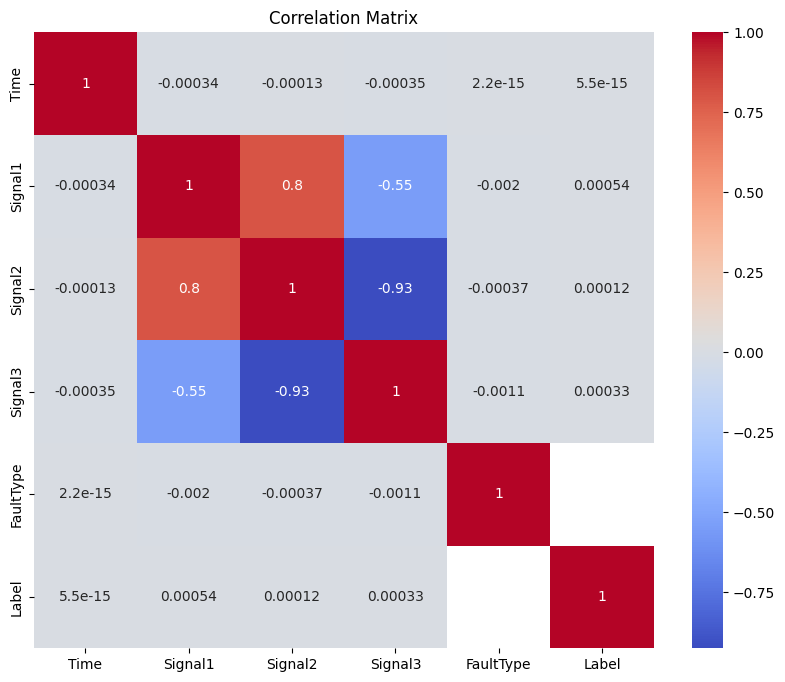

In [ ]:

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#droping Time from the table
df = df.drop("Time", axis = True)

In [ ]:
df.head(10)

,Signal1,Signal2,Signal3,FaultType,Label
0,-0.155287,-0.758693,0.913980,NaN,0
1,0.155311,0.758691,-0.914002,NaN,0
2,-0.155282,-0.758695,0.913977,NaN,0
3,0.155280,0.758697,-0.913977,NaN,0
4,-0.155278,-0.758699,0.913976,NaN,0
5,0.155281,0.758696,-0.913977,NaN,0
6,-0.155281,-0.758696,0.913977,NaN,0
7,0.155283,0.758694,-0.913977,NaN,0
8,-0.155278,-0.758698,0.913976,NaN,0
9,0.155282,0.758695,-0.913976,NaN,0


Comprehensive Data Analysis

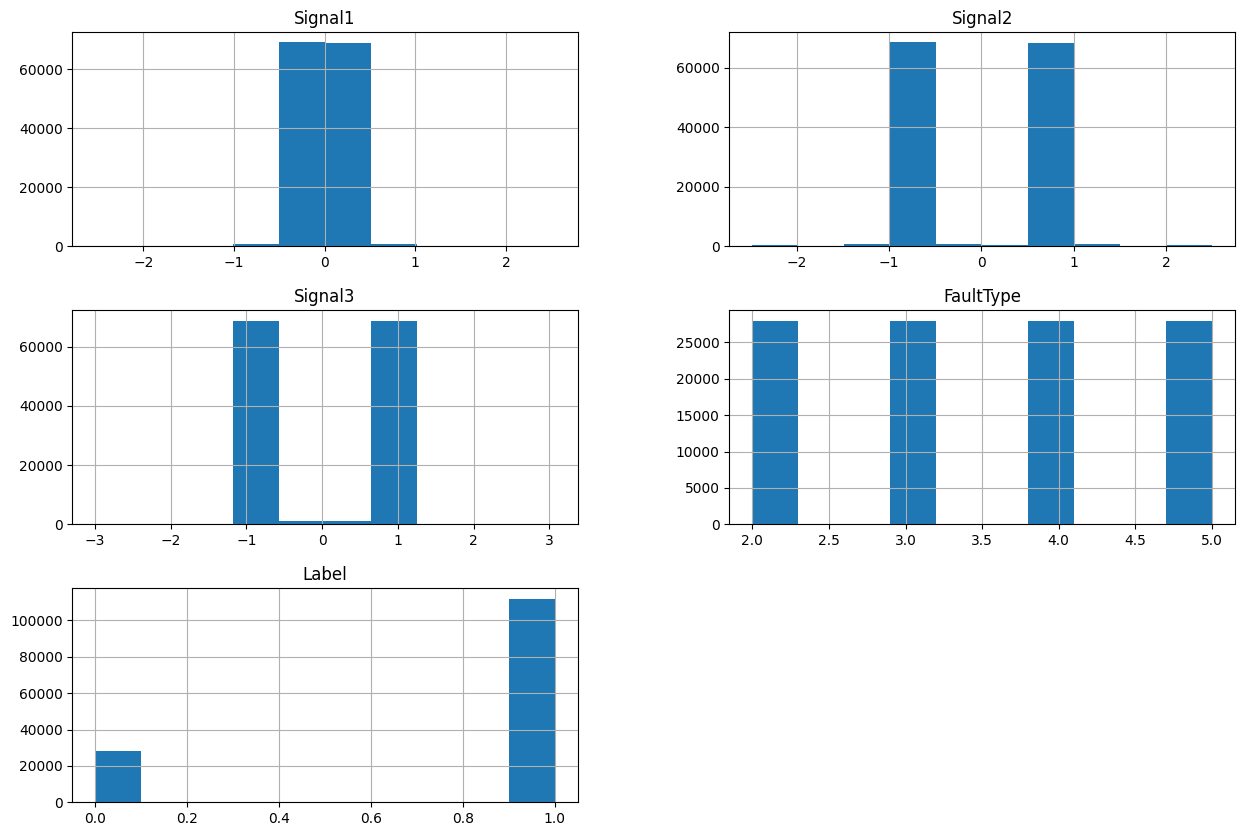

In [ ]:
df.hist(figsize=(15, 10))
plt.show()


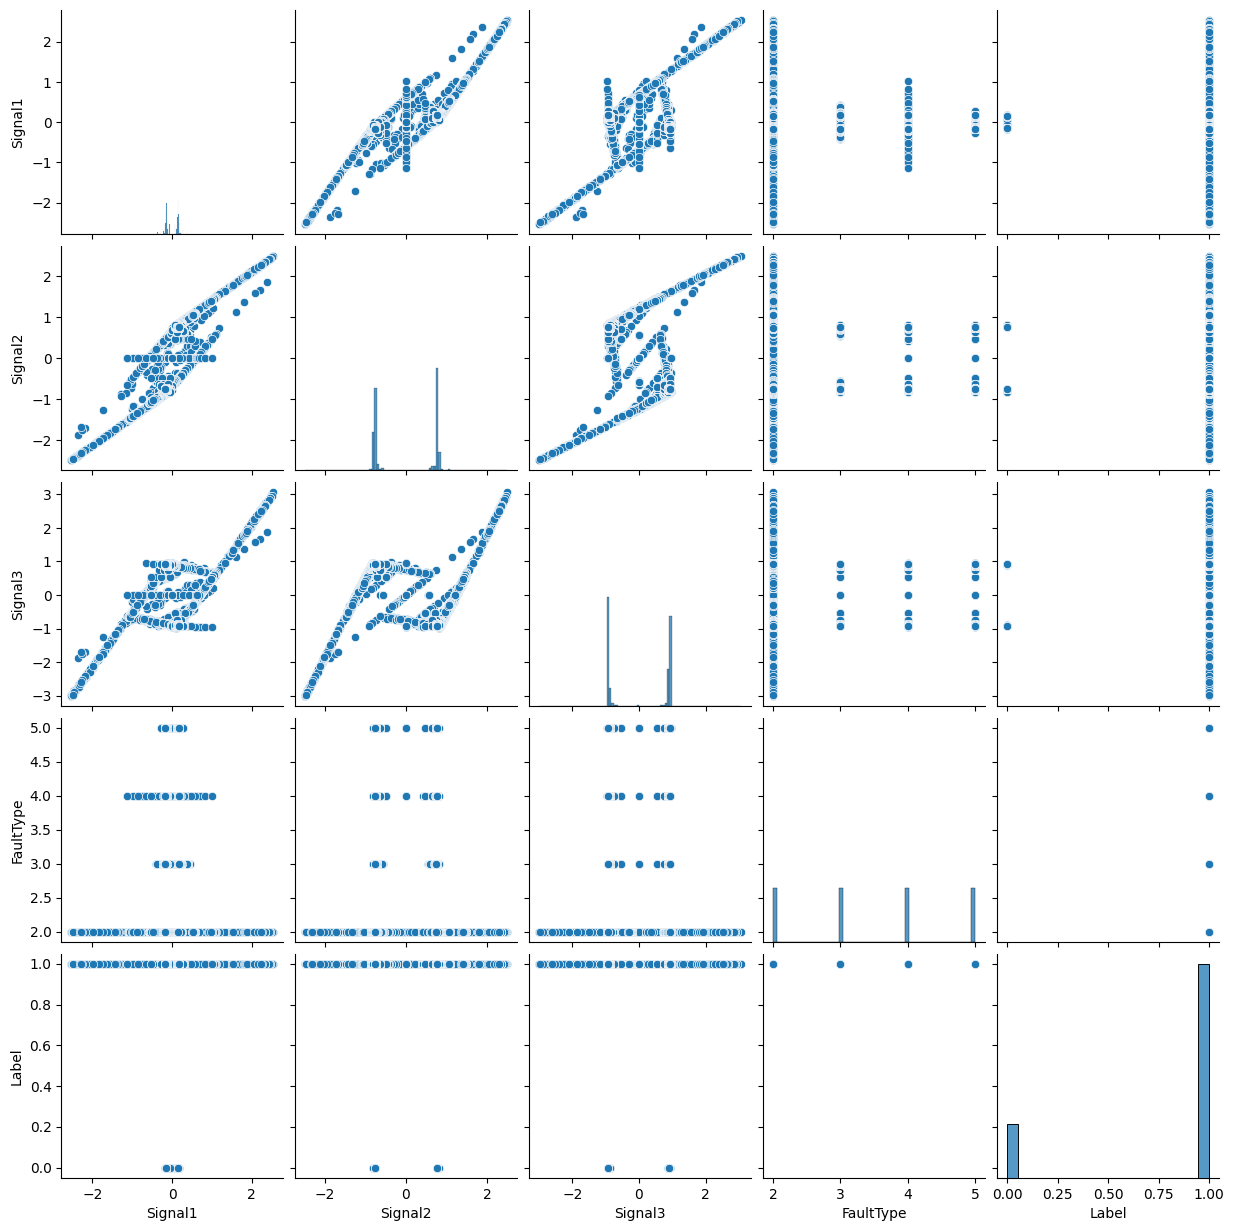

In [ ]:
#Pairplot to understand relations between each data
sns.pairplot(df)
plt.show()

<ipython-input-13-c9b1fd2b405d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


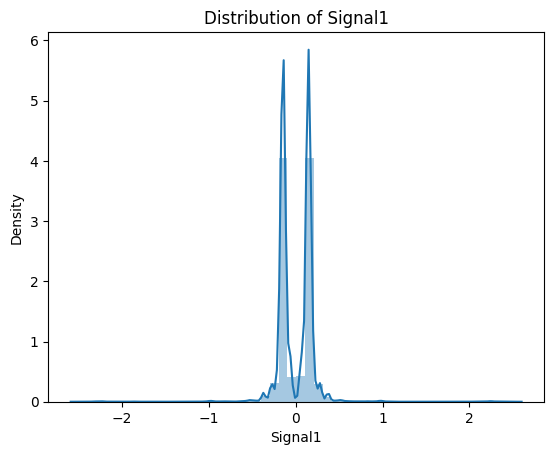

<ipython-input-13-c9b1fd2b405d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


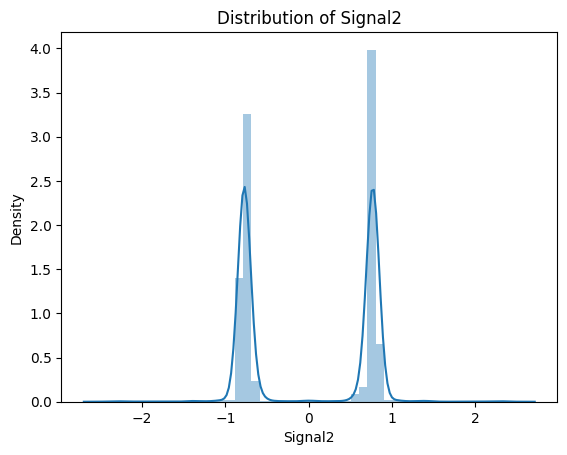

<ipython-input-13-c9b1fd2b405d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


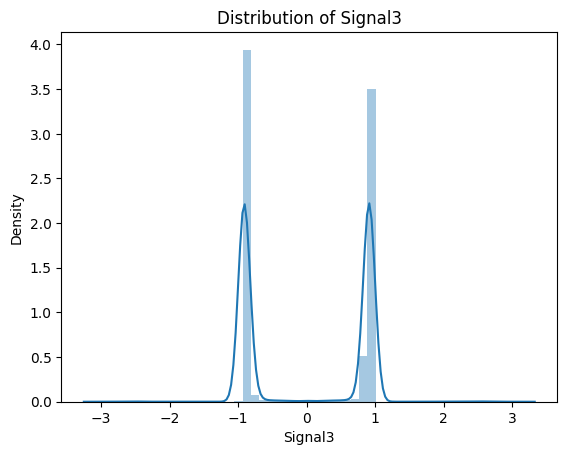

<ipython-input-13-c9b1fd2b405d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


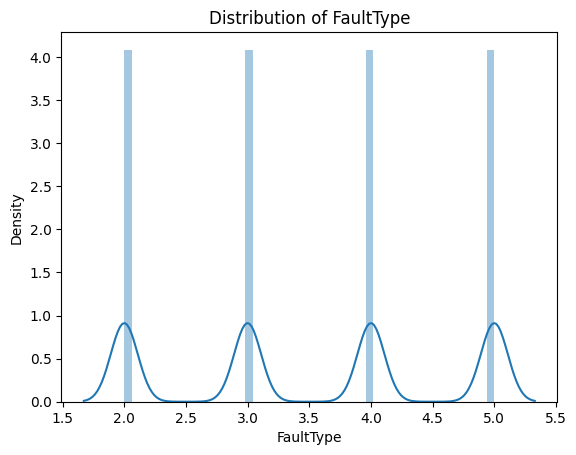

<ipython-input-13-c9b1fd2b405d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


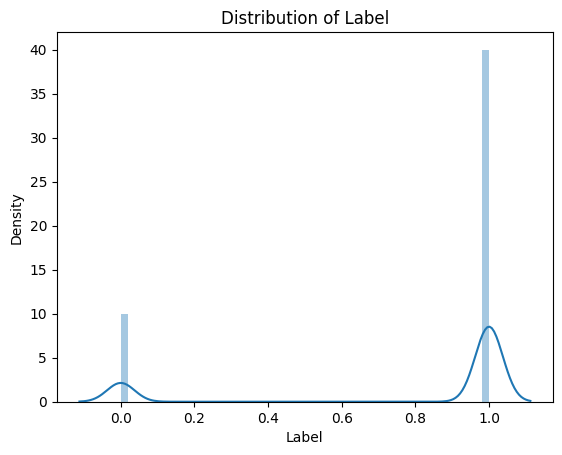

In [ ]:
#Data Distribution
# Distribution plots
for col in df.columns:
  plt.figure()
  sns.distplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

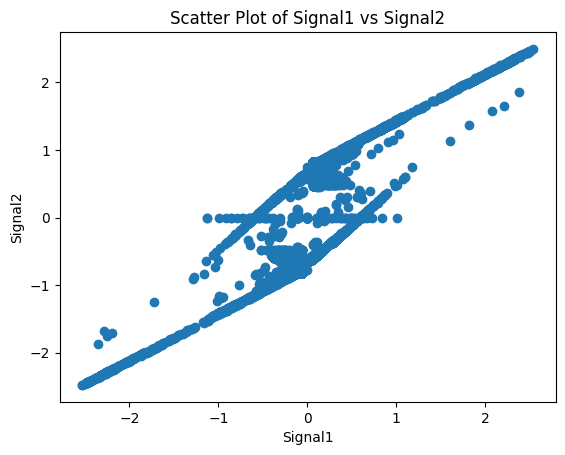

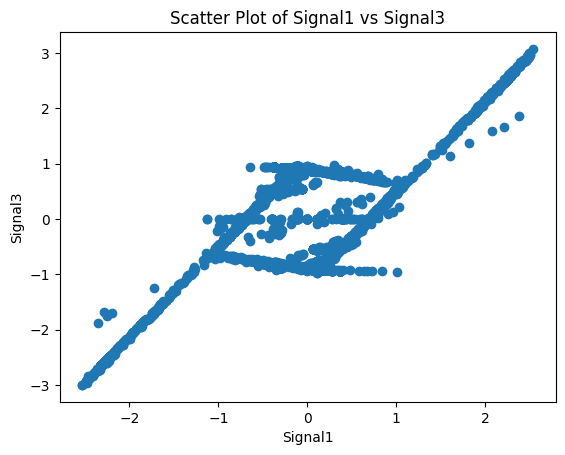

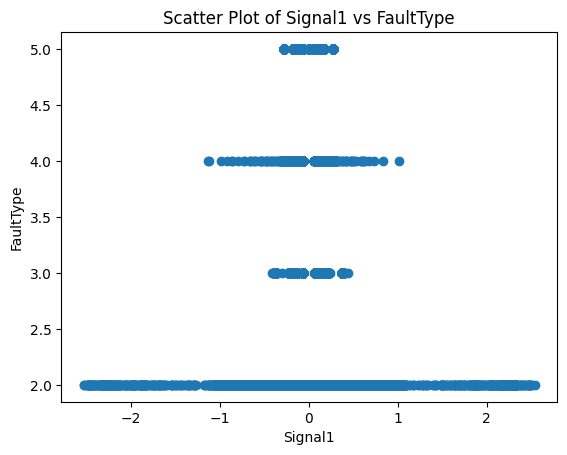

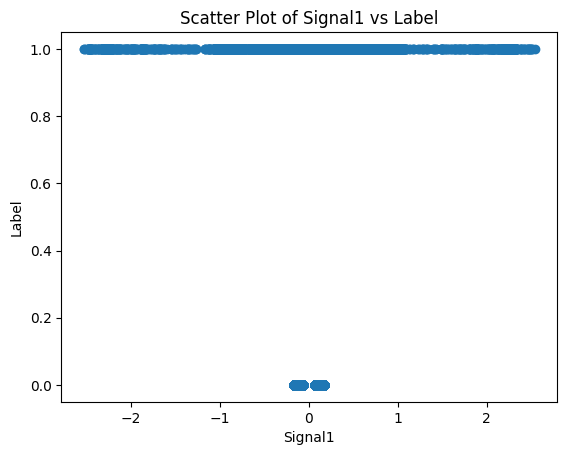

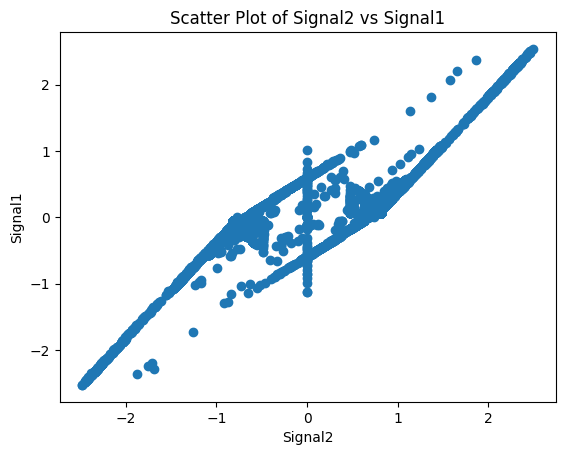

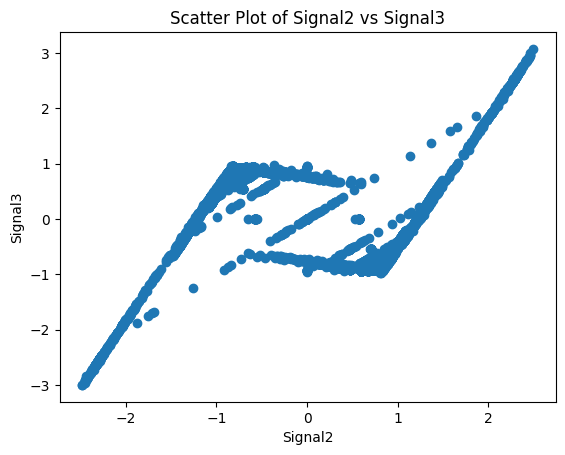

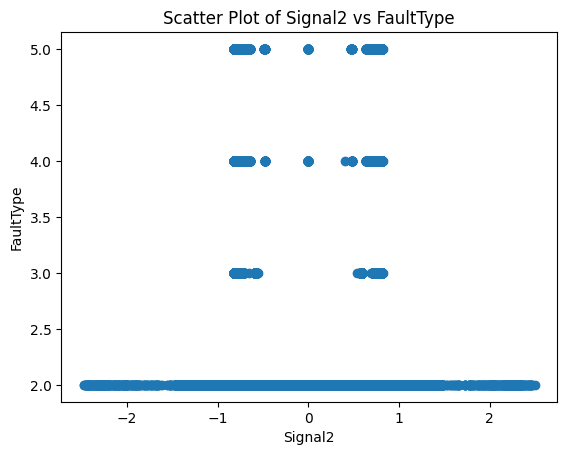

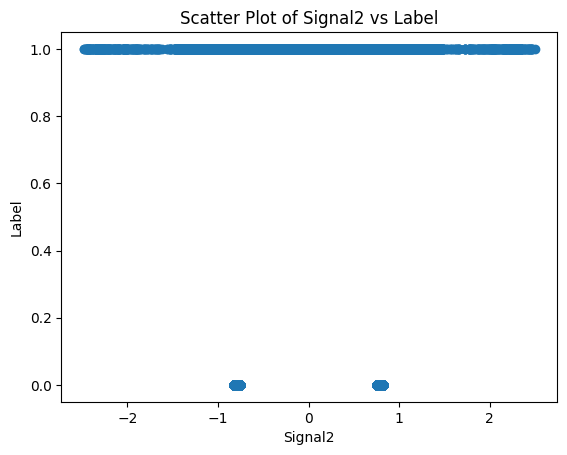

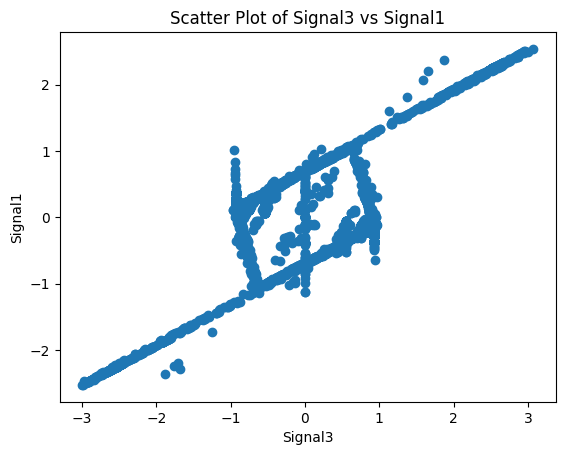

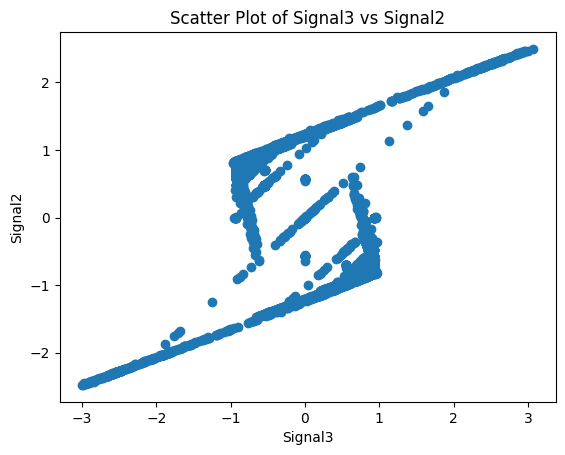

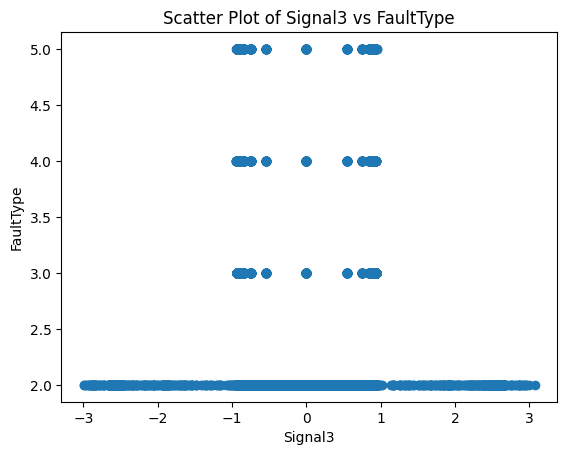

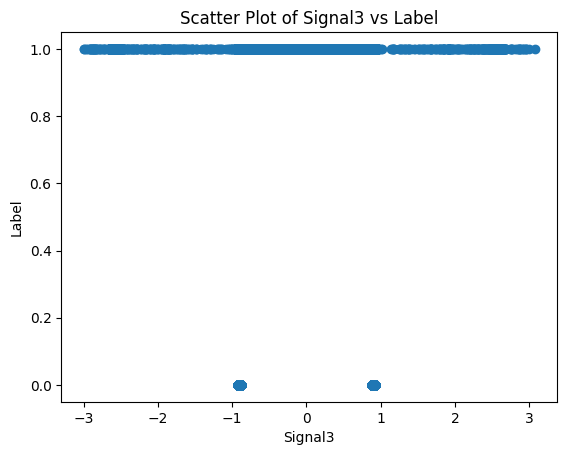

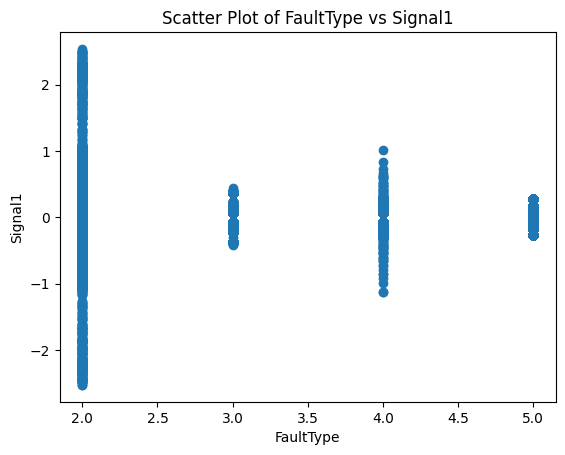

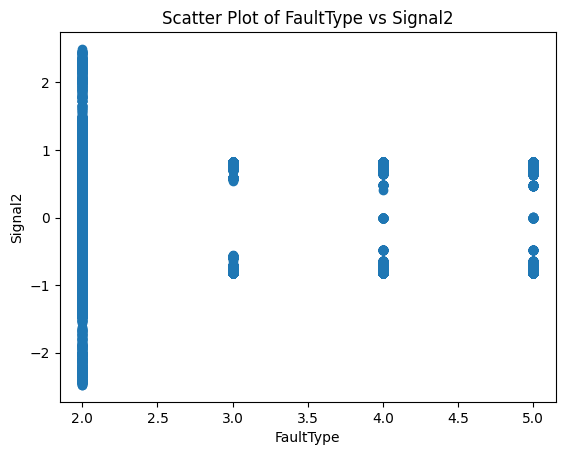

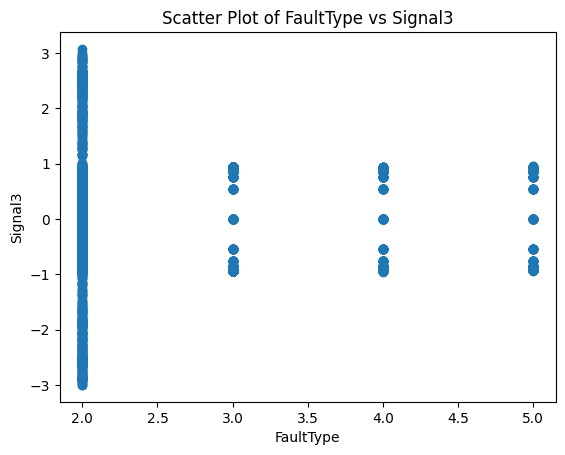

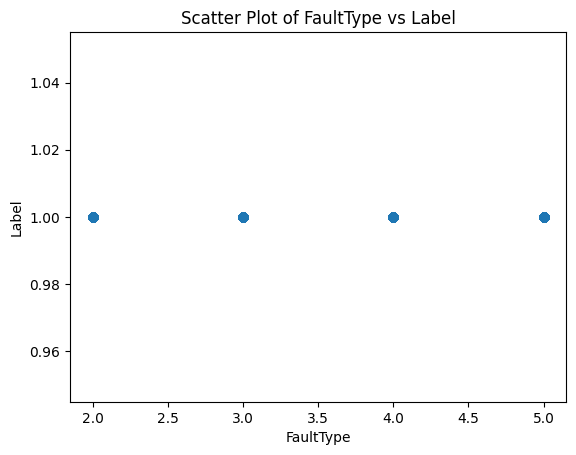

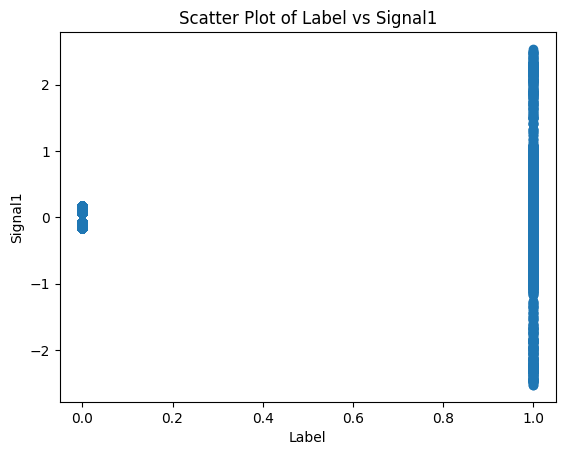

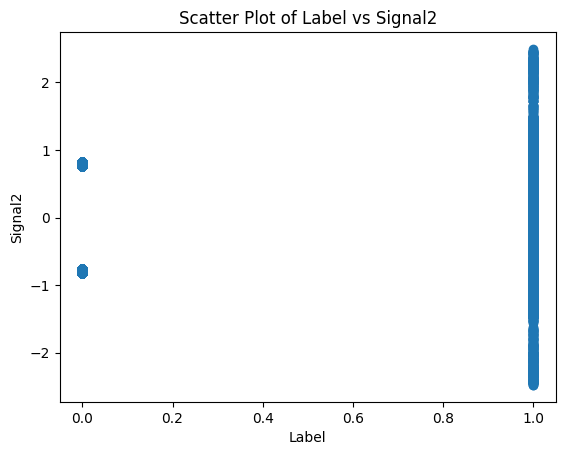

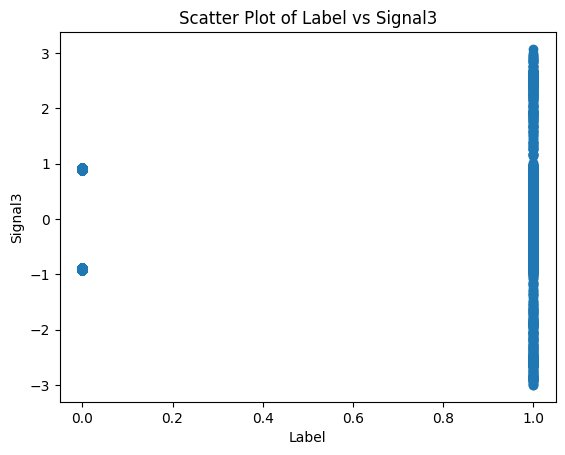

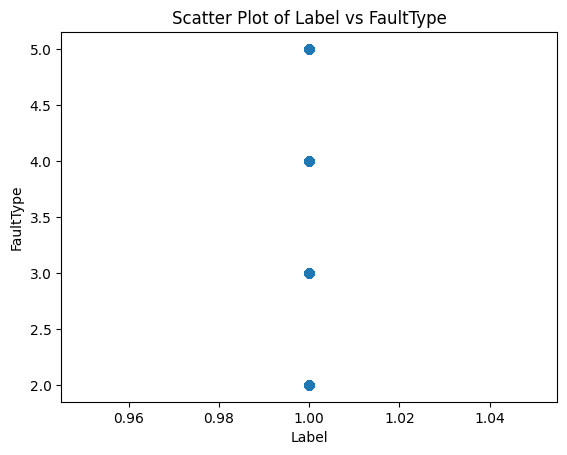

In [ ]:
# Scatter plots for selected features
for col1 in df.columns:
  for col2 in df.columns:
    if col1 != col2:
      plt.figure()
      plt.scatter(df[col1], df[col2])
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.title(f'Scatter Plot of {col1} vs {col2}')
      plt.show()

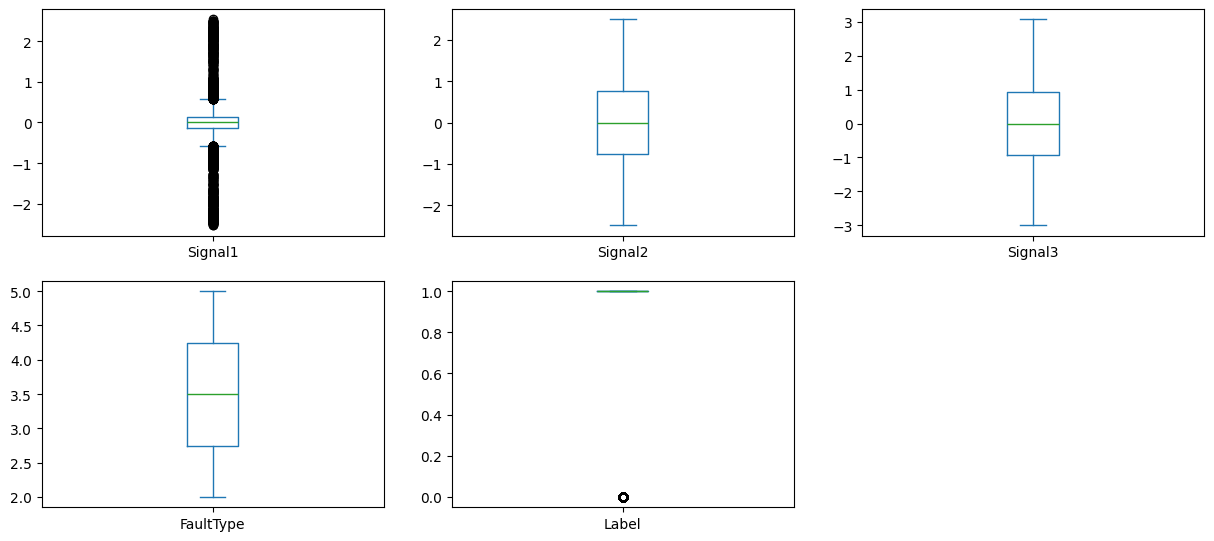

In [ ]:
# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.show()

In [ ]:
#Using RandomSampler to undersample the data Distribution
X = df.drop('Label', axis=1)
y = df['Label']

rus = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced DataFrame
new_df = pd.DataFrame(X_resampled, columns=X.columns)
new_df['Label'] = y_resampled


In [ ]:
df.head()

,Signal1,Signal2,Signal3,FaultType,Label
0,-0.155287,-0.758693,0.913980,NaN,0
1,0.155311,0.758691,-0.914002,NaN,0
2,-0.155282,-0.758695,0.913977,NaN,0
3,0.155280,0.758697,-0.913977,NaN,0
4,-0.155278,-0.758699,0.913976,NaN,0


In [ ]:
#Shuffling all the datas among itself to make remove linearity
shuffled_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

shuffled_df.head(40)

,Signal1,Signal2,Signal3,FaultType,Label
0,-0.161602,-0.750430,0.909793,3.0,1
1,0.171962,0.754305,-0.925853,5.0,1
2,-0.161600,-0.750450,0.909808,3.0,1
3,0.154499,0.756557,-0.909604,5.0,1
4,-0.065110,-0.817473,0.882519,3.0,1
5,-0.159371,-0.758517,0.917645,5.0,1
6,-0.157359,-0.760273,0.917632,NaN,0
7,-0.136806,-0.773416,0.910222,NaN,0
8,-0.064552,-0.817961,0.882513,NaN,0
9,-0.273392,-0.676189,0.929729,5.0,1


In [ ]:
#Statical description of shuffeled data
print(shuffled_df.info())
shuffled_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56082 entries, 0 to 56081
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Signal1    56055 non-null  float64
 1   Signal2    56055 non-null  float64
 2   Signal3    56055 non-null  float64
 3   FaultType  28041 non-null  float64
 4   Label      56082 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 MB
None


,Signal1,Signal2,Signal3,FaultType,Label
count,56055.000000,56055.000000,56055.000000,28041.000000,56082.000000
mean,-0.000179,-0.000034,-0.000632,3.494669,0.500000
std,0.192969,0.782448,0.912580,1.113070,0.500004
min,-2.485064,-2.449120,-2.918360,2.000000,0.000000
25%,-0.139973,-0.768993,-0.916809,3.000000,0.000000
50%,0.001282,0.009185,0.000296,3.000000,0.500000
75%,0.139973,0.768993,0.916809,4.000000,1.000000
max,2.454561,2.429083,2.857621,5.000000,1.000000


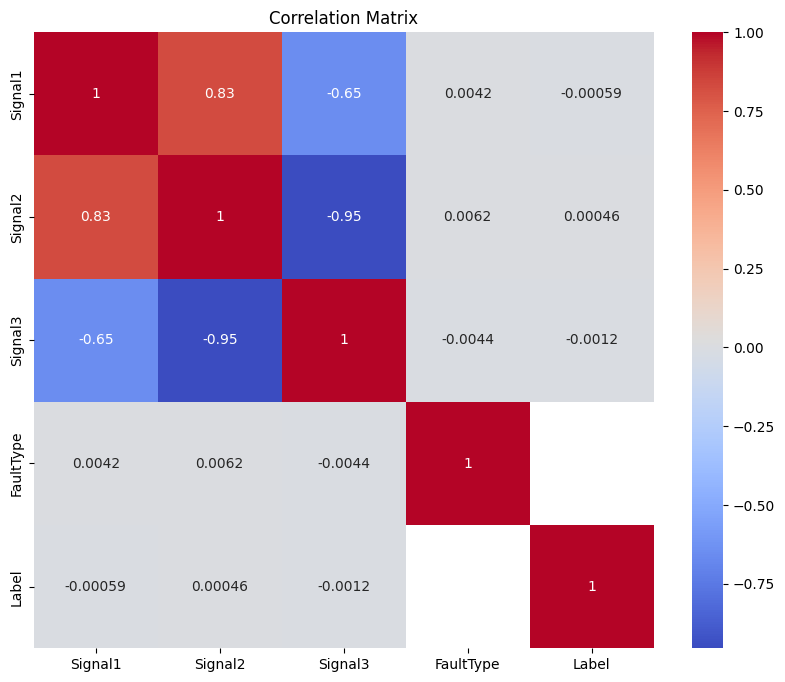

In [ ]:
#Ploting new heatmap on undersmapled data
correlation_matrix = shuffled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-21-ce07a242bcec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shuffled_df[col], shade=True)


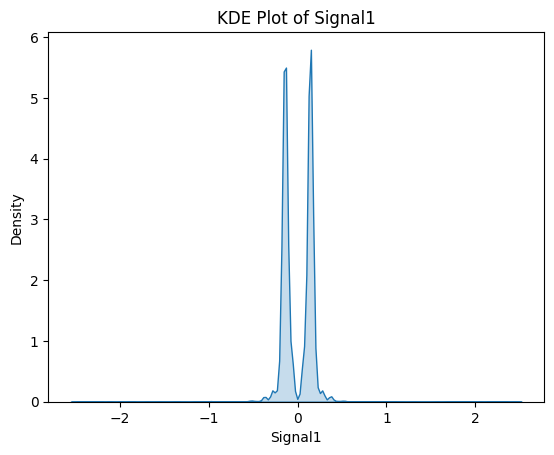

<ipython-input-21-ce07a242bcec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shuffled_df[col], shade=True)


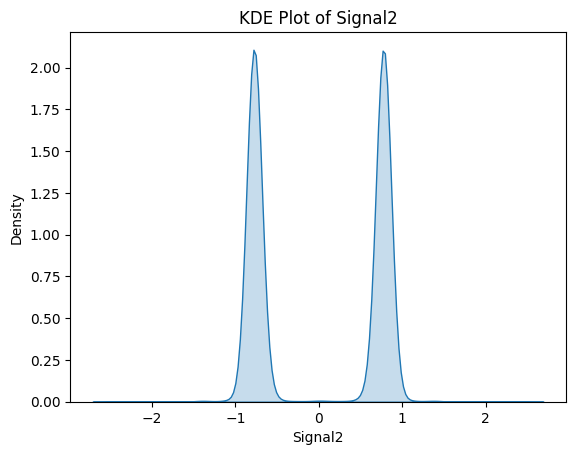

<ipython-input-21-ce07a242bcec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shuffled_df[col], shade=True)


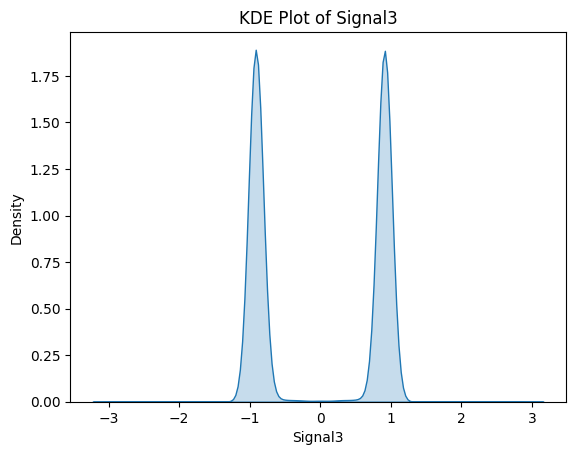

<ipython-input-21-ce07a242bcec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shuffled_df[col], shade=True)


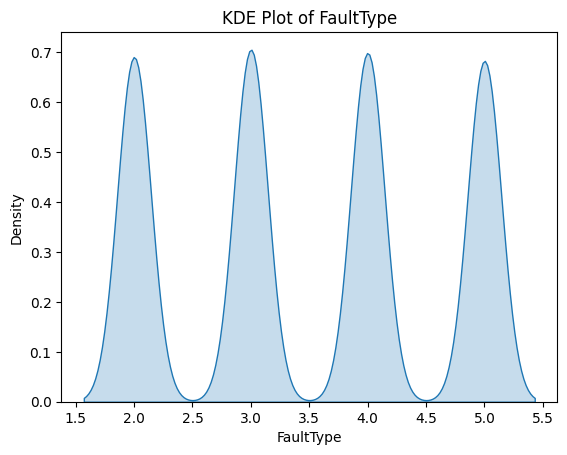

<ipython-input-21-ce07a242bcec>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shuffled_df[col], shade=True)


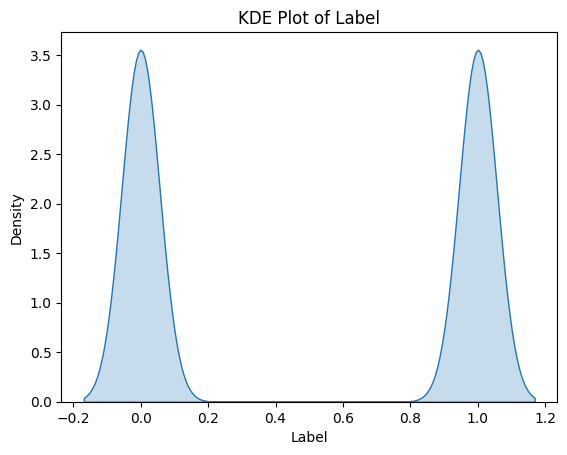

In [ ]:
# KDE plots for numerical features
for col in shuffled_df.columns:
    if pd.api.types.is_numeric_dtype(shuffled_df[col]):  # Check if column is numeric
        plt.figure()
        sns.kdeplot(shuffled_df[col], shade=True)
        plt.title(f'KDE Plot of {col}')
        plt.show()

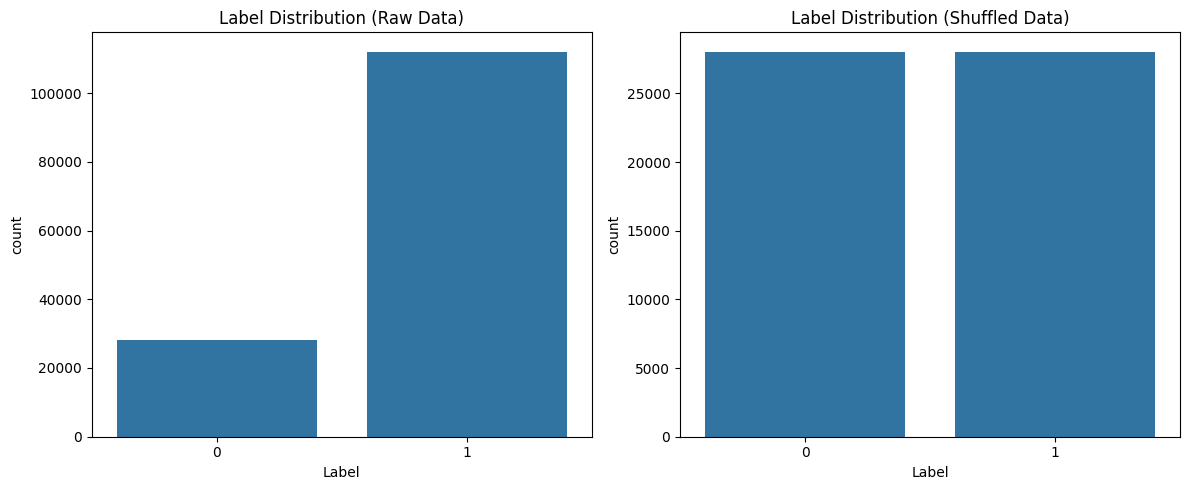

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Label', data=df, ax=axes[0])
axes[0].set_title('Label Distribution (Raw Data)')

sns.countplot(x='Label', data=shuffled_df, ax=axes[1])
axes[1].set_title('Label Distribution (Shuffled Data)')

plt.tight_layout()
plt.show()


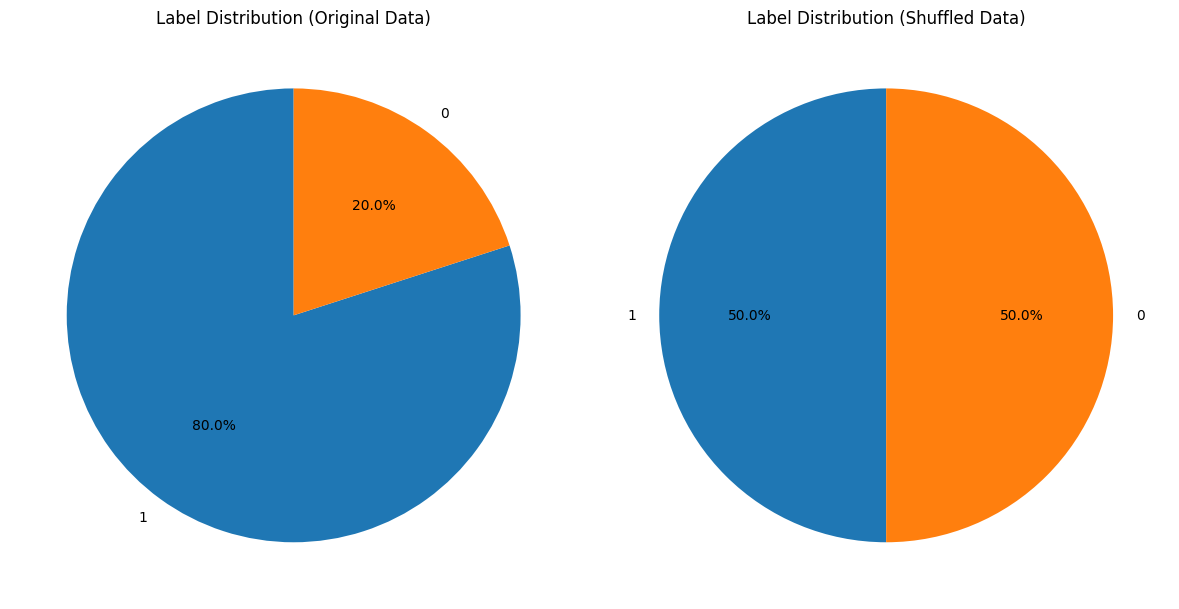

In [ ]:
label_counts_original = df['Label'].value_counts()
label_counts_shuffled = shuffled_df['Label'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(label_counts_original, labels=label_counts_original.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Label Distribution (Original Data)')

axes[1].pie(label_counts_shuffled, labels=label_counts_shuffled.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Label Distribution (Shuffled Data)')

plt.tight_layout()
plt.show()

Data Preprocessing

In [ ]:
shuffled_df = shuffled_df.dropna()
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56029 entries, 0 to 56081
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal1  56029 non-null  float64
 1   Signal2  56029 non-null  float64
 2   Signal3  56029 non-null  float64
 3   Label    56029 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.1 MB


In [ ]:
#Splitting data for training
X = shuffled_df[['Signal1', 'Signal2', 'Signal3']]
y = shuffled_df['Label']


In [ ]:
def create_classifiers():
    return {
        "Logistic Regression": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=1000))
        ]),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "SVM": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(probability=True))
        ]),
        "KNN": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        "Naive Bayes": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', GaussianNB())
        ])
    }

In [ ]:
def evaluate_classifiers(X, y, validation_split=0.2, early_stopping_rounds=50):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_split, random_state=42)
    classifiers = create_classifiers()
    results = {}

    for name, clf in classifiers.items():
        # Training with early stopping for supported classifiers
        if hasattr(clf, 'fit') and isinstance(clf.get_params().get('clf', None),
            (GradientBoostingClassifier, RandomForestClassifier)):
            clf.fit(X_train, y_train, clf__validation_fraction=0.2,
                   clf__n_iter_no_change=early_stopping_rounds)
        else:
            clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        results[name] = {
            'accuracy': accuracy_score(y_val, y_pred),
            'precision': precision_score(y_val, y_pred, average='weighted'),
            'recall': recall_score(y_val, y_pred, average='weighted'),
            'f1': f1_score(y_val, y_pred, average='weighted')
        }

    return results, classifiers

In [ ]:
def plot_metrics(results):
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    for idx, metric in enumerate(metrics):
        values = [results[clf][metric] for clf in results]
        ax = axes[idx]
        bars = ax.bar(results.keys(), values)
        ax.set_title(f'{metric.capitalize()} Score')
        ax.set_xticklabels(results.keys(), rotation=45)
        ax.set_ylim(0, 1)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom')

    plt.tight_layout()
    return plt




In [ ]:
def print_results(results):
    results_df = pd.DataFrame(results).T
    results_df = results_df.round(3)
    print("\nClassifier Performance Metrics:")
    print(results_df)

    print("\nBest Classifiers:")
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        best_clf = max(results.items(), key=lambda x: x[1][metric])[0]
        best_score = results[best_clf][metric]
        print(f"Best {metric}: {best_clf} ({best_score:.3f})")

In [ ]:

results, classifiers = evaluate_classifiers(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
print_results(results)



Classifier Performance Metrics:
                     accuracy  precision  recall     f1
Logistic Regression     0.471      0.466   0.471  0.444
Decision Tree           0.999      0.999   0.999  0.999
Random Forest           0.999      0.999   0.999  0.999
Gradient Boosting       0.982      0.983   0.982  0.982
AdaBoost                0.947      0.952   0.947  0.947
SVM                     0.709      0.714   0.709  0.707
KNN                     0.999      0.999   0.999  0.999
Naive Bayes             0.604      0.778   0.604  0.528

Best Classifiers:
Best accuracy: Random Forest (0.999)
Best precision: KNN (0.999)
Best recall: Random Forest (0.999)
Best f1: Random Forest (0.999)


<ipython-input-28-e105aa18659c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)
<ipython-input-28-e105aa18659c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)
<ipython-input-28-e105aa18659c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)
<ipython-input-28-e105aa18659c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results.keys(), rotation=45)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

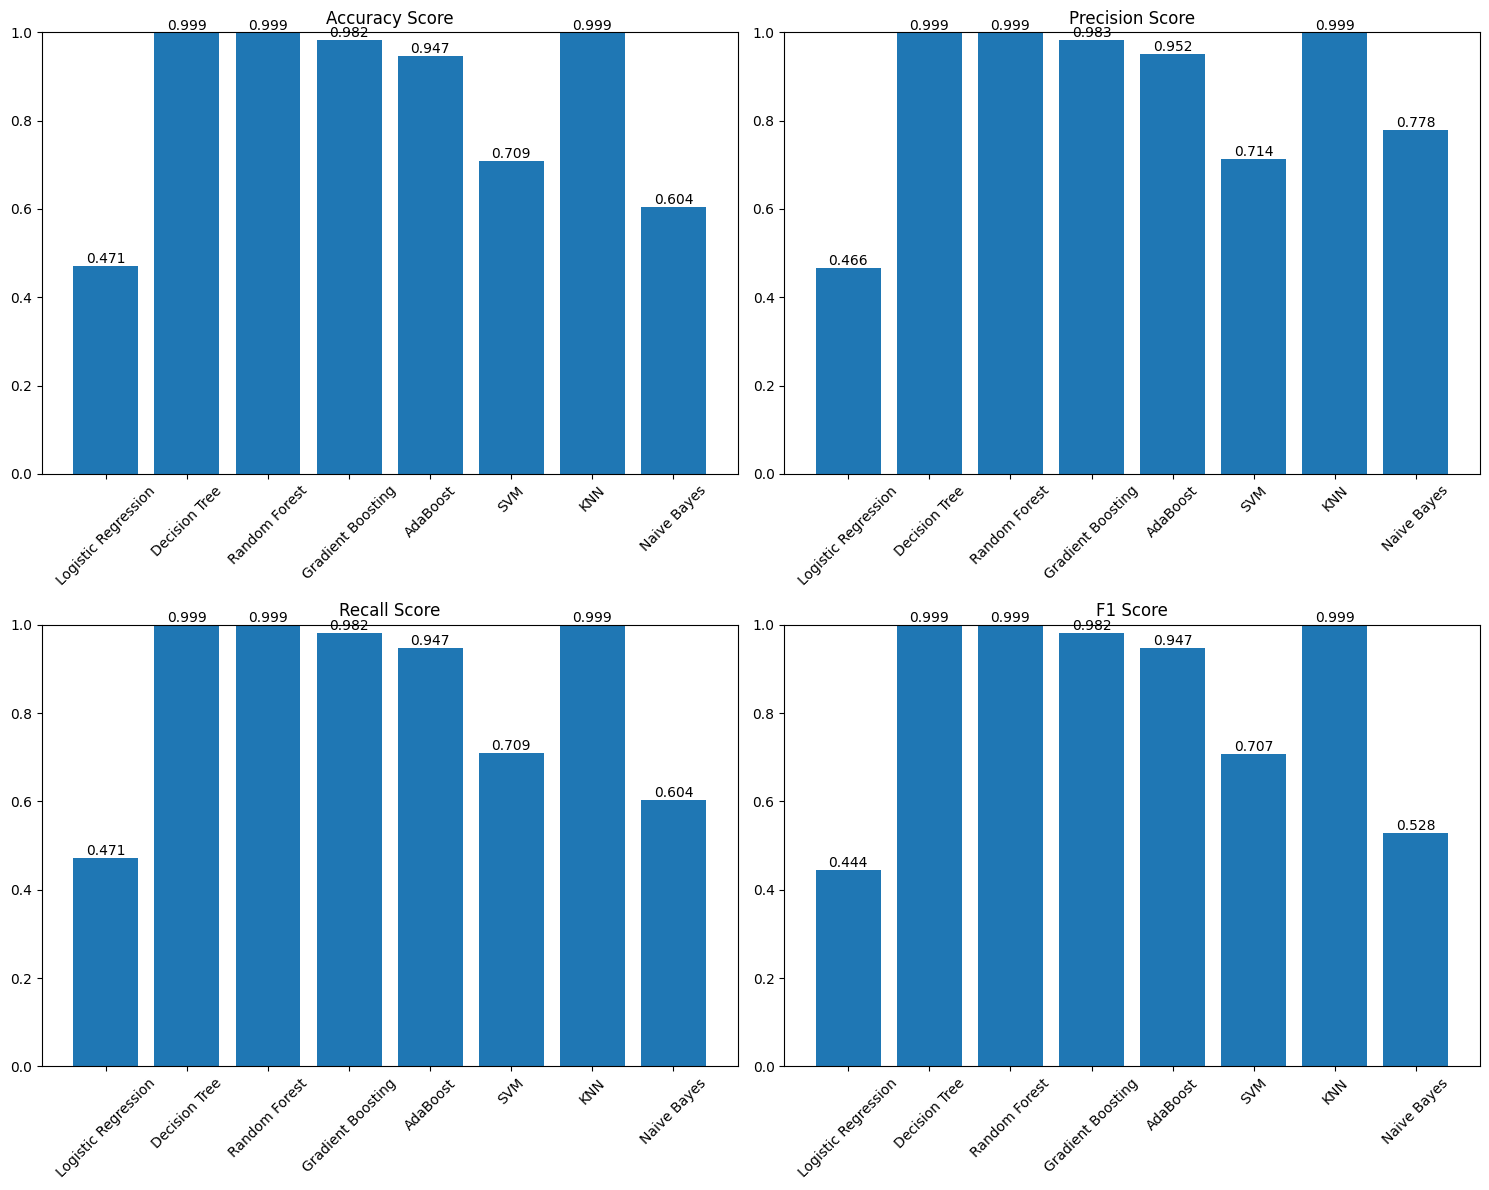

In [ ]:
plot_metrics(results)